# Projet 3 OpenFoodFacts - Notebook de nettoyage du jeu de données

Lien vers les consignes du projet sur openclassrooms : https://openclassrooms.com/fr/projects/628/assignment

description du jeu de données : https://world.openfoodfacts.org/data/data-fields.txt

# Question 1 Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations.

## Environnement & Imports

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

## Chargement Dataset

In [3]:
data = pd.read_csv('data/en.openfoodfacts.org.products.csv', sep='\t')

C:\Users\Vincent\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#data_orig = data.copy()

In [5]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-

In [6]:
data.shape

(1007980, 175)

In [7]:
data.dtypes

code                                          object 
url                                           object 
creator                                       object 
created_t                                     int64  
created_datetime                              object 
last_modified_t                               int64  
last_modified_datetime                        object 
product_name                                  object 
generic_name                                  object 
quantity                                      object 
packaging                                     object 
packaging_tags                                object 
brands                                        object 
brands_tags                                   object 
categories                                    object 
categories_tags                               object 
categories_en                                 object 
origins                                       object 
origins_tags                

In [8]:
data.shape

(1007980, 175)

## Contrôle des colonnes

In [9]:
#liste_colonnes = data.columns.tolist()

In [10]:
def control_columns(dataframe):
    '''Fonction qui contrôle si les colonnes du dataframe à cleaner correspondent\
bien à ce qui est attendu'''
    
    liste_colonnes = ['code', 
                      'url', 
                      'creator', 
                      'created_t', 
                      'created_datetime', 
                      'last_modified_t', 
                      'last_modified_datetime', 
                      'product_name', 
                      'generic_name', 
                      'quantity', 
                      'packaging', 
                      'packaging_tags', 
                      'brands', 
                      'brands_tags', 
                      'categories', 
                      'categories_tags', 
                      'categories_en', 
                      'origins', 
                      'origins_tags', 
                      'manufacturing_places', 
                      'manufacturing_places_tags', 
                      'labels',
                      'labels_tags',
                      'labels_en',
                      'emb_codes',
                      'emb_codes_tags',
                      'first_packaging_code_geo',
                      'cities',
                      'cities_tags',
                      'purchase_places',
                      'stores',
                      'countries',
                      'countries_tags',
                      'countries_en',
                      'ingredients_text',
                      'allergens',
                      'allergens_en',
                      'traces',
                      'traces_tags',
                      'traces_en',
                      'serving_size',
                      'serving_quantity',
                      'no_nutriments',
                      'additives_n',
                      'additives',
                      'additives_tags',
                      'additives_en',
                      'ingredients_from_palm_oil_n',
                      'ingredients_from_palm_oil',
                      'ingredients_from_palm_oil_tags',
                      'ingredients_that_may_be_from_palm_oil_n',
                      'ingredients_that_may_be_from_palm_oil',
                      'ingredients_that_may_be_from_palm_oil_tags',
                      'nutrition_grade_fr',
                      'nova_group', 
                      'pnns_groups_1', 
                      'pnns_groups_2',
                      'states',
                      'states_tags',
                      'states_en',
                      'main_category',
                      'main_category_en',
                      'image_url',
                      'image_small_url',
                      'image_ingredients_url',
                      'image_ingredients_small_url', 
                      'image_nutrition_url',
                      'image_nutrition_small_url',
                      'energy_100g',
                      'energy-from-fat_100g',
                      'fat_100g',
                      'saturated-fat_100g',
                      '-butyric-acid_100g',
                      '-caproic-acid_100g', 
                      '-caprylic-acid_100g',
                      '-capric-acid_100g',
                      '-lauric-acid_100g', 
                      '-myristic-acid_100g',
                      '-palmitic-acid_100g',
                      '-stearic-acid_100g',
                      '-arachidic-acid_100g', 
                      '-behenic-acid_100g',
                      '-lignoceric-acid_100g', 
                      '-cerotic-acid_100g',
                      '-montanic-acid_100g',
                      '-melissic-acid_100g', 
                      'monounsaturated-fat_100g',
                      'polyunsaturated-fat_100g',
                      'omega-3-fat_100g',
                      '-alpha-linolenic-acid_100g',
                      '-eicosapentaenoic-acid_100g',
                      '-docosahexaenoic-acid_100g',
                      'omega-6-fat_100g',
                      '-linoleic-acid_100g',
                      '-arachidonic-acid_100g',
                      '-gamma-linolenic-acid_100g',
                      '-dihomo-gamma-linolenic-acid_100g',
                      'omega-9-fat_100g',
                      '-oleic-acid_100g',
                      '-elaidic-acid_100g',
                      '-gondoic-acid_100g',
                      '-mead-acid_100g',
                      '-erucic-acid_100g',
                      '-nervonic-acid_100g',
                      'trans-fat_100g',
                      'cholesterol_100g',
                      'carbohydrates_100g',
                      'sugars_100g',
                      '-sucrose_100g',
                      '-glucose_100g',
                      '-fructose_100g',
                      '-lactose_100g',
                      '-maltose_100g',
                      '-maltodextrins_100g',
                      'starch_100g', 
                      'polyols_100g',
                      'fiber_100g',
                      'proteins_100g',
                      'casein_100g',
                      'serum-proteins_100g',
                      'nucleotides_100g',
                      'salt_100g',
                      'sodium_100g',
                      'alcohol_100g',
                      'vitamin-a_100g',
                      'beta-carotene_100g',
                      'vitamin-d_100g',
                      'vitamin-e_100g',
                      'vitamin-k_100g',
                      'vitamin-c_100g',
                      'vitamin-b1_100g',
                      'vitamin-b2_100g',
                      'vitamin-pp_100g',
                      'vitamin-b6_100g',
                      'vitamin-b9_100g',
                      'folates_100g',
                      'vitamin-b12_100g',
                      'biotin_100g',
                      'pantothenic-acid_100g',
                      'silica_100g',
                      'bicarbonate_100g',
                      'potassium_100g',
                      'chloride_100g',
                      'calcium_100g',
                      'phosphorus_100g',
                      'iron_100g',
                      'magnesium_100g',
                      'zinc_100g',
                      'copper_100g',
                      'manganese_100g',
                      'fluoride_100g',
                      'selenium_100g',
                      'chromium_100g',
                      'molybdenum_100g',
                      'iodine_100g',
                      'caffeine_100g',
                      'taurine_100g',
                      'ph_100g',
                      'fruits-vegetables-nuts_100g',
                      'fruits-vegetables-nuts-dried_100g',
                      'fruits-vegetables-nuts-estimate_100g',
                      'collagen-meat-protein-ratio_100g',
                      'cocoa_100g',
                      'chlorophyl_100g',
                      'carbon-footprint_100g',
                      'carbon-footprint-from-meat-or-fish_100g',
                      'nutrition-score-fr_100g',
                      'nutrition-score-uk_100g',
                      'glycemic-index_100g',
                      'water-hardness_100g',
                      'choline_100g',
                      'phylloquinone_100g',
                      'beta-glucan_100g',
                      'inositol_100g',
                      'carnitine_100g']
    
    error = 0
    for column in liste_colonnes:
        try :
            dataframe[column]
        except:
            print('il manque la colonne {} dans le jeu de données'.format(column))
            error += 1
    
    if error > 0 :
        print('Erreur : jeu de données non chargé, il manque {} colonne(s) \
dans le jeu de données'.format(error))
        return False
    
    
    elif dataframe.shape[1] != len(liste_colonnes):
        print('il y a des colonnes en trop dans le jeu de données :')
        print(set(dataframe.columns.tolist()) - set(liste_colonnes))
        return False
    
    else:
        return True  
    
    

## Nettoyage types

Catégories de colonnes identifées par observation des données

In [11]:
def nettoyage_types(dataframe):
    '''Corrige les types pour les colonnes dont les résultats sont des booléens'''
    try :
        #booleans
        bool_columns = ['ingredients_that_may_be_from_palm_oil']
        for column in bool_columns:
            dataframe[column] = dataframe[column].astype('bool')

        #ints
        int_columns = []
        for column in int_columns:
            dataframe[column] = dataframe[column].astype('int64')

        #floats
        float_columns = ['cities', 'allergens_en', 'serving_quantity', 'no_nutriments', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g', '-capric-acid_100g', '-lauric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g', '-stearic-acid_100g', '-arachidic-acid_100g', '-behenic-acid_100g', '-lignoceric-acid_100g', '-cerotic-acid_100g', '-montanic-acid_100g', '-melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', '-alpha-linolenic-acid_100g', '-eicosapentaenoic-acid_100g', '-docosahexaenoic-acid_100g', 'omega-6-fat_100g', '-linoleic-acid_100g', '-arachidonic-acid_100g', '-gamma-linolenic-acid_100g', '-dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', '-oleic-acid_100g', '-elaidic-acid_100g', '-gondoic-acid_100g', '-mead-acid_100g', '-erucic-acid_100g', '-nervonic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', '-sucrose_100g', '-glucose_100g', '-fructose_100g', '-lactose_100g', '-maltose_100g', '-maltodextrins_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'casein_100g', 'serum-proteins_100g', 'nucleotides_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g', 'chromium_100g', 'molybdenum_100g', 'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-dried_100g', 'fruits-vegetables-nuts-estimate_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g', 'carbon-footprint_100g', 'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g', 'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g', 'inositol_100g', 'carnitine_100g']
        for column in float_columns:
            dataframe[column] = dataframe[column].astype('float64')

        #objects
        object_columns = ['code', 'url', 'cities', 'creator', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'additives', 'additives_tags', 'additives_en', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en', 'main_category', 'main_category_en', 'image_url', 'image_small_url', 'image_ingredients_url', 'image_ingredients_small_url', 'image_nutrition_url', 'image_nutrition_small_url']
        for column in object_columns:
            dataframe[column] = dataframe[column].astype('object')

        #categories
        categories_columns = ['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'nova_group']
        for column in categories_columns:
            dataframe[column] = dataframe[column].astype('category')


        #pour les datetime, voir paragraphe de nettoyage suivant
    except:
        print('Erreur de conversion de type, vérifiez les colonnes')
        
    return dataframe

## Format timestamp des colonnes

In [12]:
#Observation des colonnes qui contiennent le _t et le _datetime
print(data.iloc[:,data.columns.str.endswith('_t')].head())
print('\n', data.iloc[:,data.columns.str.endswith('_datetime')].head())

    created_t  last_modified_t
0  1529059080  1561463718     
1  1539464774  1539464817     
2  1560020173  1560020173     
3  1535737982  1535737986     
4  1542456332  1542456333     

        created_datetime last_modified_datetime
0  2018-06-15T10:38:00Z  2019-06-25T11:55:18Z 
1  2018-10-13T21:06:14Z  2018-10-13T21:06:57Z 
2  2019-06-08T18:56:13Z  2019-06-08T18:56:13Z 
3  2018-08-31T17:53:02Z  2018-08-31T17:53:06Z 
4  2018-11-17T12:05:32Z  2018-11-17T12:05:33Z 


fields that end with _t are dates in the UNIX timestamp format (number of seconds since Jan 1st 1970)


fields that end with _datetime are dates in the iso8601 format: yyyy-mm-ddThh:mn:ssZ

In [13]:
from datetime import datetime
import time

def clean_datetime(dataframe):
    '''Fonction pour transformer les colonnes de suffixe _t & _datetime en 
    format timestamp et renommer les colonnes'''
    columns = dataframe.columns
    columns_treated = []
    for column in columns:
        if column[-2:] == '_t':
            new_column = column[:-2]
            dataframe[new_column] = pd.to_datetime(dataframe[column], 
                                                   unit='s') 
            dataframe = dataframe.drop(column, axis=1)
            
        #elif str(column).endswith("_datetime"):
        #    new_column = column[:-9]
        #    dataframe[new_column] = dataframe[column]\
        #    .apply(pd.to_datetime, infer_datetime_format = True, format = "%Y-%m-%dT%h:%M:%s")
        #    columns_treated.append(new_column)
            
        #else:
        #    columns_treated.append(column)
            
    return dataframe

## Traitement des colonnes "Tags"

## Pays d'origine

In [14]:
def categorize(chaine, mapping):
    group = 'autre'
    for key in mapping:
        if key in str(chaine):
            group = mapping[key]
            break
    return group

def traitement_tags(dataframe):

    #packaging_tags
    mapping = {'plastique' : 'plastique',
                            'kunststoff' : 'plastique',
                            'sachet' : 'plastique',
                            'verre' : 'verre',
                            'carton' : 'carton',
                            'plastique' : 'plastique',
                            'conserve' : 'conserve'}

    dataframe['packaging_tags'] = dataframe['packaging_tags'].apply(categorize, args=[mapping])
    dataframe['packaging_tags'] = dataframe['packaging_tags'].astype('category')
    #print(dataframe['packaging_tags'].unique())
    
    #brands_tags
    mapping = {'carrefour' : 'carrefour',
          'auchan' : 'auchan',
          'leader-price' : 'leader-price',
          'delhaize' : 'delhaize',
          'casino' : 'casino',
          'nestle' : 'nestle',
          'cora' : 'cora',
          'hacendado' : 'hacendado'}
    dataframe['brands_tags'] = dataframe['brands_tags'].apply(categorize, args=[mapping])
    dataframe['brands_tags'] =dataframe['brands_tags'].astype('category')
    #print(dataframe['brands_tags'].unique())
    
    

    #categories_tags
    #mapping = {''}
    #dataframe[''] = dataframe[''].apply(categorize)
    #dataframe.drop([''], axis=1, inplace=True)
    
    #origins_tags
    mapping = {'france' : 'france',
              'italie' : 'italie',
              'belgique' : 'belgique',
              'deutschland' : 'allemagne',
              'suisse' : 'suisse',
              'allemagne' : 'allemagne',
              'mexico' : 'mexique',
              'espana' : 'espagne'}
    dataframe['origins_tags'] = dataframe['origins_tags'].apply(categorize, args=[mapping])
    dataframe['origins_tags'] = dataframe['origins_tags'].astype('category')
    #print(dataframe['origins_tags'].unique())

    
    #manufacturing_places_tags
    mapping = {'france': 'france',
          'italie': 'italie',
          'belgique':'belgique',
          'deutschland' : 'allemagne',
          'suisse':'suisse',
          'allemagne' : 'allemagne',
          'mexico' : 'mexique',
           'espana' : 'espagne',
           'espagne' : 'espagne'
          }
    dataframe['manufacturing_places_tags'] = dataframe['manufacturing_places_tags'].apply(categorize, args=[mapping])
    dataframe['manufacturing_places_tags'] = dataframe['manufacturing_places_tags'].astype('category')
    #print(dataframe['manufacturing_places_tags'].unique())

               
    #labels_tags
    mapping = {'organic' : 'bio',
           'gluten-free' : 'sans gluten',
           'biologique' : 'bio',
            'green-dot' : 'recyclable',
           'vegan' : 'vegan',
           'vegetarian' : 'vegetarien',
           'france' : 'made in france',
           'no-preservatives' : 'sans conservateur',
           'no-colorings' : 'sans colorants',
           'no-added-sugar' : 'sans sucre ajouté'
          }
    dataframe['labels_tags'] = dataframe['labels_tags'].apply(categorize, args=[mapping])
    dataframe['labels_tags'] = dataframe['labels_tags'].astype('category')
    #print(dataframe['labels_tags'].unique())
    
               
    #emb_codes_tags : à supprimer / pas de patern
    dataframe.drop(['emb_codes_tags'], axis=1, inplace=True)
    
    #cities_tags : pas de traitement à réaliser
    
    #countries_tags
    mapping = {'france': 'france'}
    dataframe['countries_tags'] = dataframe['countries_tags'].apply(categorize, args=[mapping])
    dataframe['countries_tags'] = dataframe['countries_tags'].astype('category')
    #print(dataframe['countries_tags'].unique())
    
        
    #traces_tags
    mapping = {'nuts' : 'arachides',
           'milk' : 'lait',
           'gluten' : 'gluten',
           'soybeans' : 'graines de soja',
           'peanuts' : 'arachides',
          'eggs' : 'oeufs'}
    dataframe['traces_tags'] = dataframe['traces_tags'].apply(categorize, args=[mapping])
    dataframe['traces_tags'] = dataframe['traces_tags'].astype('category')
    #print(dataframe['traces_tags'].unique())
    
    
    #additives_tags
    mapping = {'en:e330' : 'E330',
               'en:e322' : 'E322/E322I',
               'en:e322i' : 'E322/E322I',
               'en:e440' : 'E440/E440I' ,
               'en:e440i' : 'E440/E440I',
               'en:e415' : 'E415',
               'en:e300' : 'E300',
               'en:e14xx' : 'E14XX',
               'en:e407' : 'E407',
               'en:E250' : 'E250',
               'en:E316' : 'E316'}
    dataframe['additives_tags'] = dataframe['additives_tags'].apply(categorize, args=[mapping])
    dataframe['additives_tags'] = dataframe['additives_tags'].astype('category')
    #print(dataframe['additives_tags'].unique())
    
      
               
    #ingredients_from_palm_oil_tags
    mapping = {'huile-de-palme' : 'huile-de-palme',
           'e304-palmitate-d-ascorbyle' : 'E304',
           'palme' : 'huile-de-palme'}
    dataframe['ingredients_from_palm_oil_tags'] = dataframe['ingredients_from_palm_oil_tags'].apply(categorize, args=[mapping])
    dataframe['ingredients_from_palm_oil_tags'] = dataframe['ingredients_from_palm_oil_tags'].astype('category')
    #print(dataframe['ingredients_from_palm_oil_tags'].unique())
     
      
               
    #ingredients_that_may_be_from_palm_oil_tags
    mapping = {'e471-mono-et-diglycerides-d-acides-gras-alimentaires' : 'E471',
           'huile végétale' : 'huile végétale',
           'e160a-beta-carotene' : 'e160a-beta-carotene',
           'e433-monooleate-de-polyoxyethylene-de-sorbitane' : 'E433',
           'e472e-ester-monoacethyltartrique-de-mono-et-diglycerides-d-acides-gras' : 'E472',
           'e471-mono-et-diglycerides-d-acides-gras-alimentaires,e481-stearoyl-2-lactylate-de-sodium' : 'E471'}
    dataframe['ingredients_that_may_be_from_palm_oil_tags'] = dataframe['ingredients_that_may_be_from_palm_oil_tags'].apply(categorize, args=[mapping])
    dataframe['ingredients_that_may_be_from_palm_oil_tags'] = dataframe['ingredients_that_may_be_from_palm_oil_tags'].astype('category')
    #print(dataframe['ingredients_that_may_be_from_palm_oil_tags'].unique())
    
    
    #'states_tags' - n'apporte pas d'information, peut être supprimée
    dataframe = dataframe.drop(['states_tags'], axis=1)
    
    
    return dataframe

In [15]:
data.countries.unique().tolist()

['France',
 'en:France',
 'en:france',
 'en:fr',
 'United States',
 'Irlande',
 'en:FR',
 nan,
 'en:be',
 'United Kingdom',
 'États-Unis, en:france',
 'France, United States',
 'France,États-Unis',
 'Canada',
 'Suisse',
 'en:Germany',
 'France, États-Unis',
 'Pérou',
 'Schweiz',
 'Oman',
 'Spain',
 'Deutschland',
 'Slovenia',
 'en:DE',
 'Frankreich, Deutschland',
 'France,Germany,Netherlands',
 'en:KW',
 'ફ્રાન્સ',
 'France,Switzerland',
 'Frankreich, en:de',
 'France, en:de',
 'Italy',
 'Romania',
 'en:US',
 'España',
 'Australia',
 'Portugal',
 'en:Turkey',
 'en:Italy',
 'Germany',
 'en:RE',
 'en:spain',
 'Israel',
 'en:CH',
 'en:Netherlands',
 'us',
 'Royaume-Uni',
 'en:es',
 'en:ES',
 'États-Unis',
 'france',
 'en:Australia',
 'en:de',
 'México',
 'en:Switzerland',
 'Rwanda',
 'France, United Kingdom',
 'France, Royaume-Uni',
 'France,United Kingdom',
 'Belgique, France, Pays-Bas, Royaume-Uni',
 'Guadeloupe',
 'en:United Kingdom',
 'Belgium',
 'chile',
 'Frankreich',
 'Belgique',
 

In [16]:
def tri_pays(dataframe):
    '''Réduction du dataframe à la France'''
    liste_pays = ['France', 'FR', 'en:FR', 'en:fr', 'en:France', 'Frankreich', 
              'france', 'Réunion', 'Francia', 'French Polynesia', 'Frankrijk', 
              'Nouvelle-Calédonie', 'Martinique', 'Guadeloupe', 
              'Polynésie Française', 'Mayotte']
    dataframe = dataframe.drop(['nutrition-score-uk_100g'],axis=1)    
    return dataframe[dataframe['countries'].isin(liste_pays)]

## Suppression des colonnes contenant trop de NaN

In [132]:
def print_control_shape_nan(dataframe):
        print('........Proportion de NaN : {} %, Taille du jeu de données : {}\n'
              .format(round(dataframe.isna().sum().sum()/dataframe.shape[0]/dataframe.shape[1],2)*100,
                      dataframe.shape))
        

In [89]:
data['energy_100g'].isna().sum()/data['energy_100g'].shape[0]

0.19853965356455486

In [18]:
#nan_quantity = (data.shape[0] - data.isna().sum())/data.shape[0]

In [19]:
#meaning_columns = nan_quantity[nan_quantity>0.01].index.tolist()

In [20]:
def clean_nan(dataframe, taux_nan_max) :
    '''Nettoyage des faux "nan" en "NaN et Suppression des colonnes ayant 
    moins de valeurs que le taux de rétention.
    Renvoie en sortie la dataframe sans les colonnes non conservées'''
    
    #remplacement des "faux NaN" en NaN reconnus par pandas
    dataframe = dataframe.replace(to_replace = '^nan$', value = np.nan, regex=True)
    
    non_nan_quantity = (dataframe.shape[0] - dataframe.isna().sum())/dataframe.shape[0]
    
    nb_NaN = dataframe.shape[1]
    
    dataframe = dataframe[non_nan_quantity[non_nan_quantity > 1- taux_nan_max].index.tolist()]
    
    nb_NaN = nb_NaN - dataframe.shape[1]
    
    print('Nombre de colonnes supprimées :', nb_NaN)
    
    return dataframe

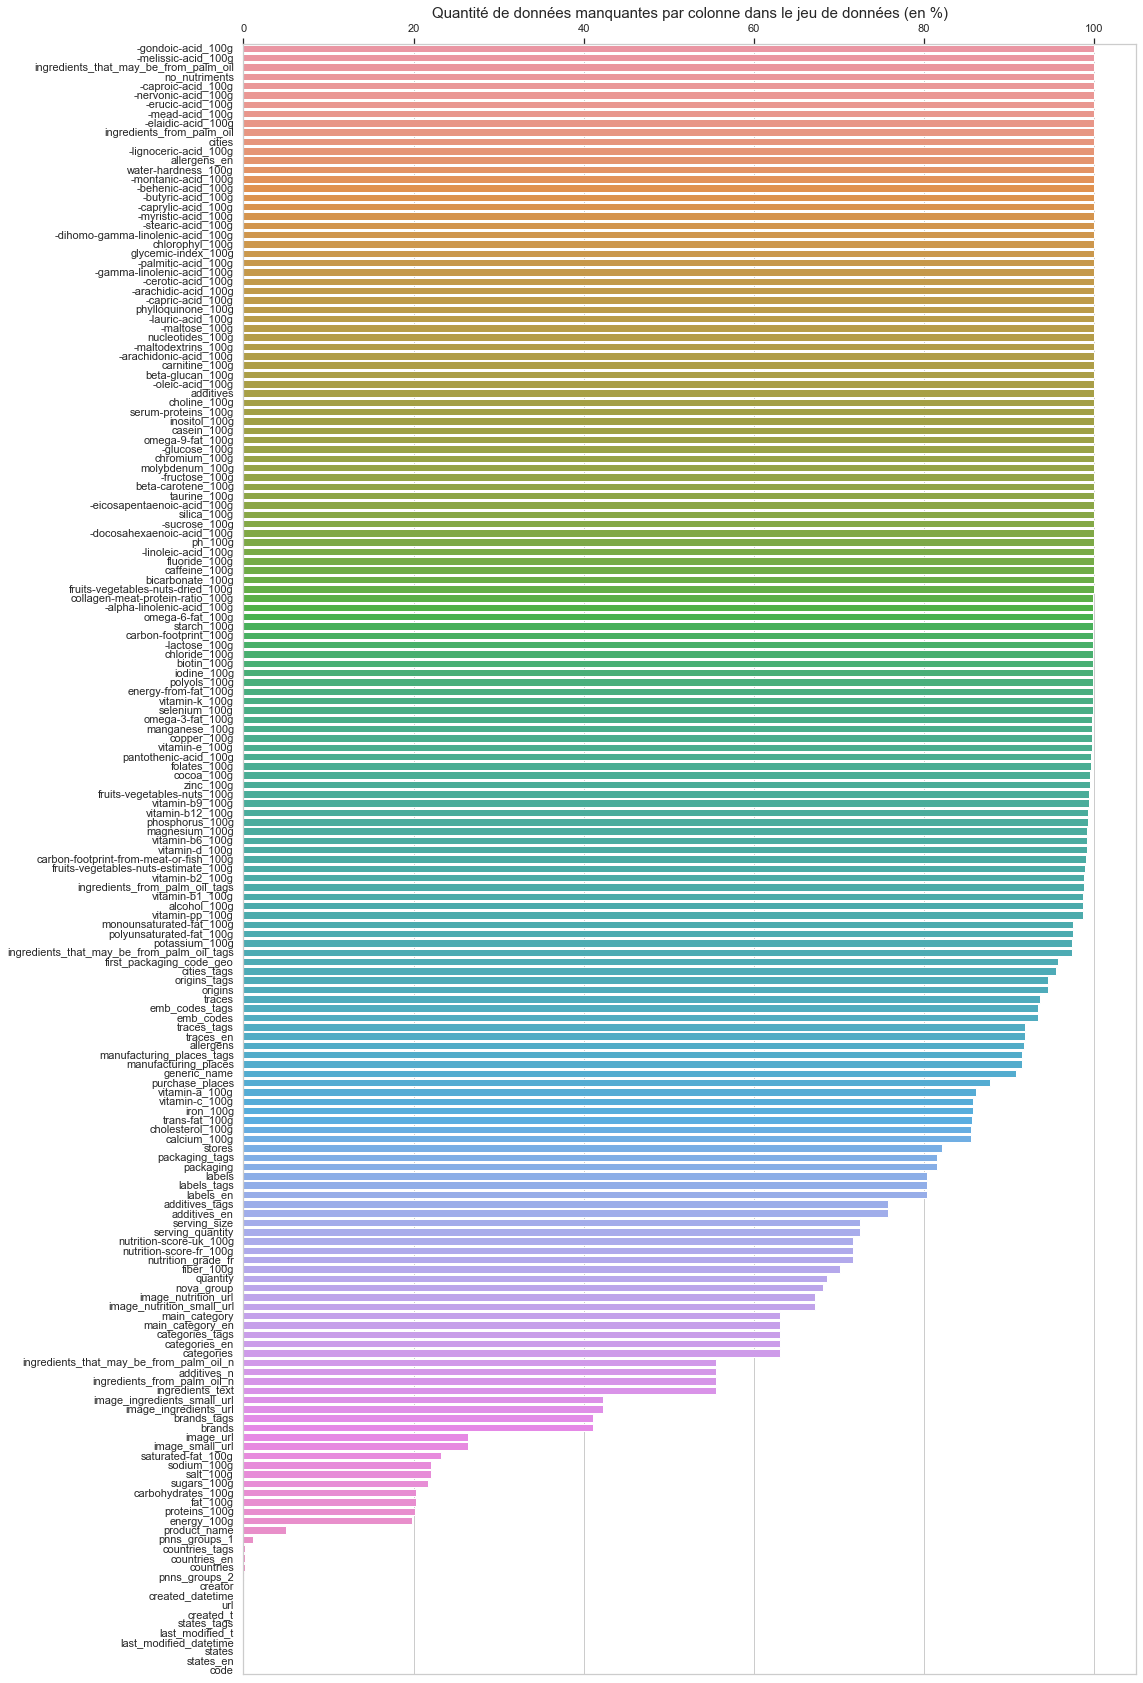

In [21]:
proportion_nan = data.isna().sum().divide(data.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan.index, x=proportion_nan.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)
plt.show()

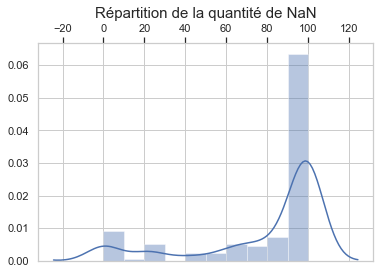

In [22]:
sns.set(style="whitegrid")
ax = sns.distplot(proportion_nan.values)
ax.xaxis.set_ticks_position('top')
plt.title('Répartition de la quantité de NaN', size=15)
plt.show()

## Traitement des outliers

### Intuitions

Essayons 2 méthodes de traitement des outliers sur une feature de notre jeu de données:

In [23]:
def delete_outliers_std(dataframe):
    '''Suppression des outliers trop éloignés de la moyenne'''
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :
        
        dataframe.loc[dataframe[column] > dataframe[column].mean() + 2 * dataframe[column].std()] = np.nan
        dataframe.loc[dataframe[column] < dataframe[column].mean() - 2 * dataframe[column].std()] = np.nan
        dataframe.loc[dataframe[column] < 0] = np.nan
        
    return dataframe
    
def delete_outliers_percentiles(dataframe):
    '''Suppression des outliers du centile extrême'''
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :
        dataframe.loc[dataframe[column] > dataframe[column].quantile(0.995)] = np.nan
        dataframe.loc[dataframe[column] < dataframe[column].quantile(0.005)] = np.nan
        dataframe.loc[dataframe[column] < 0] = np.nan
    return dataframe
    

In [24]:
salt_std = delete_outliers_std(data.copy()[['energy_100g','salt_100g']])['salt_100g']
salt_percentiles = delete_outliers_percentiles(data.copy()[['energy_100g','salt_100g']])['salt_100g']


In [25]:
print('Moyenne de salt_100g : ',data['salt_100g'].mean())
print('Ecart type de salt_100g : ',data['salt_100g'].std())

Moyenne de salt_100g :  105.72120664190653
Ecart type de salt_100g :  91285.74310812438


Text(0.5, 1.0, 'Méthode par percentiles')

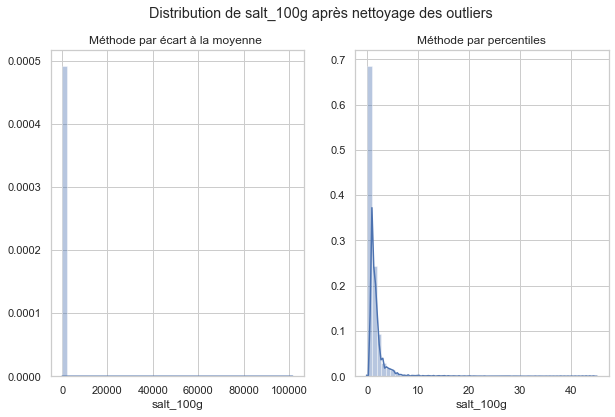

In [26]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de salt_100g après nettoyage des outliers")
ax1 = sns.distplot(salt_std.dropna(), ax=axes[0])
ax1.set_title("Méthode par écart à la moyenne ")
ax2 = sns.distplot(salt_percentiles.dropna(), ax=axes[1])
ax2.set_title("Méthode par percentiles")

In [27]:
outliers_std = pd.concat([salt_std, data['salt_100g']]).drop_duplicates(keep=False)
outliers_percentiles = pd.concat([salt_percentiles, data['salt_100g']]).drop_duplicates(keep=False)

In [28]:
print(outliers_std.shape)
print(outliers_percentiles.shape)

(1,)
(735,)


La méthode avec l'écart à la moyenne n'a identifié qu'un seul outlier. Ce résultat s'interprète par la moyenne importante et l'écart type importants causés par les outliers du jeu de données. On a un écart type de 91 285 alors que la valeur est donnée pour 100 g, l'écart type doit devrait être inférieur à 100g. Il est très probable que des  valeurs incohérentes n'ont pas été retirées du jeu de données.

La méthode avec les percentiles donne des résultats plus cohérents en termes d'ordre de grandeur. Cependant, elle présente le risque d'écarter des données cohérentes (par exemple ici les valeurs entre 40 et 100)

La fonction présenté ci-après propose de supprimer le centile extrême, les valeurs supérieures à 100 g (pour les distributions en base 100 g), ainsi que les données trop éloignées de leurs voisins (distance de Minkowski)

### Fonction

In [130]:
from sklearn.neighbors import KDTree


def delete_univariate_outliers(dataframe):
    '''Suppression des valeurs extrêmes du dataset - on exclut le centile le plus extreme
    suppression des données négatives et des valeurs supérieures à 100 g pour les indices ramenés à 100 g'''
    #valeurs extremes
    
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :
        index_nan = []
        index_nan_flat = []
        
        index_nan.append(dataframe.loc[dataframe[column] > dataframe[column].quantile(0.995)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < dataframe[column].quantile(0.005)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < 0].index.tolist())
        if (column[-5:] == '_100g') & (column != 'energy_100g'):
            index_nan.append(dataframe.loc[dataframe[column] > 100].index.tolist())
            
        for sublist in index_nan:
            for item in sublist:
                index_nan_flat.append(item)
                
        #suppression des doublons
        index_nan_flat = list(dict.fromkeys(index_nan_flat))
        dataframe[column].loc[index_nan_flat] = np.nan
            

    print_control_shape_nan(dataframe)
            
    return dataframe

def delete_multivariate_outliers(dataframe):
    '''Suppression des outliers éloignés de leurs plus proches voisins (discrimination du centile 
    le plus éloigné par la distance de minkowski de chaque observation à ses 3 plus proches voisins)'''

    numeric_data = dataframe.select_dtypes(['int32', 'float64']).copy().dropna(axis=0).dropna(axis=1)
    print_control_shape_nan(dataframe)
    try:
        kdt = KDTree(numeric_data, leaf_size = 40, metric='minkowski')
        dist, ind = kdt.query(numeric_data, k=3, return_distance=True)
    
        numeric_data['3N_distance'] = np.sum(dist, axis=1)    
        numeric_data = numeric_data[numeric_data['3N_distance'] < numeric_data['3N_distance'].quantile(0.99)]
        index_to_drop = numeric_data.index.tolist()
        dataframe = dataframe.drop(index_to_drop, axis=0)
    except ValueError:
        print('.........oops : trop de NaN dans le jeu de données, calcul de distance impossible')

    
    print_control_shape_nan(dataframe)
    
    return dataframe

def delete_outliers(dataframe):
    print('........Suppression des outliers univariés')
    dataframe = delete_univariate_outliers(dataframe)
    print('........Suppression des outliers multivariés')
    dataframe = delete_multivariate_outliers(dataframe)
    return dataframe
    


In [30]:
a = clean_nan(data.head(10000).copy(), taux_nan_max = 0.80)

Nombre de colonnes supprimées : 127


In [31]:
delete_multivariate_outliers(a)

........Proportion de NaN : 22.0%, Taille du jeu de données : (10000, 48)

........Proportion de NaN : 30.0%, Taille du jeu de données : (6013, 48)



,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,categories,categories_tags,categories_en,stores,countries,countries_tags,countries_en,ingredients_text,serving_size,serving_quantity,additives_n,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories to be completed,Brands to be completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be validated,Photos uploaded",NaN,NaN,1569.0,7.00,3.08,NaN,NaN,70.10,15.00,NaN,7.80,1.40000,0.560000,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories to be completed,Brands to be completed,Packaging to be completed,Quantity completed,Product name completed,Photos to be validated,Photos uploaded",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,Watt,watt,fr:Xsf,fr:xsf,fr:xsf,NaN,en:France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-

## Imputation des NaN par méthodes des kNN

### Intuition et test (voir fonction au chapitre suivant)

In [32]:
data_test = clean_nan(data.copy().head(10000), 0.80)

Nombre de colonnes supprimées : 127


In [33]:
(data_test.head(100))

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,categories,categories_tags,categories_en,stores,countries,countries_tags,countries_en,ingredients_text,serving_size,serving_quantity,additives_n,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories to be completed,Brands to be completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be validated,Photos uploaded",NaN,NaN,1569.0,7.00,3.08,NaN,NaN,70.10,15.00,NaN,7.80,1.40000,0.560000,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories to be completed,Brands to be completed,Packaging to be completed,Quantity completed,Product name completed,Photos to be validated,Photos uploaded",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,Watt,watt,fr:Xsf,fr:xsf,fr:xsf,NaN,en:France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-

In [34]:
numeric_columns = data_test.select_dtypes(['int32','float64']).columns
numeric_columns

Index(['serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nova_group', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g'],
      dtype='object')

In [35]:
data_test[numeric_columns]

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nova_group,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
0,NaN,NaN,NaN,NaN,NaN,1569.0,7.00,3.08,NaN,NaN,70.10,15.00,NaN,7.80,1.40000,0.560000,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,88.0,0.00,0.00,NaN,NaN,4.80,0.40,NaN,0.20,2.04000,0.816000,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,251.0,3.00,1.00,NaN,NaN,10.00,3.00,NaN,2.00,1.15000,0.460000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.0,0.0,0.0,0.0,NaN,1393.0,11.11,0.00,0.0,0.0,55.56,11.11,11.1,11.11,9.87806,3.951224,0.001,0.0,0.0,0.004
9996,6.0,1.0,0.0,0.0,4.0,1393.0,0.00,0.00,0.0,0.0,66.67,16.67,16.7,16.67,17.78000,7.112000,0.001,0.0,0.0,0.000
9997,4.0,1.0,0.0,0.0,4.0,1569.0,0.00,0.00,0.0,0.0,75.00,25.00,0.0,0.00,20.32000,8.128000,0.000,0.0,0.0,0.000
9998,4.5,1.0,0.0,0.0,4.0,1393.0,0.00,0.00,0.0,0.0,66.67,44.44,0.0,0.00,15.80388,6.321552,0.000,0.0,0.0,0.000


In [36]:
data_test.dropna(axis=0)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,categories,categories_tags,categories_en,stores,countries,countries_tags,countries_en,ingredients_text,serving_size,serving_quantity,additives_n,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
325,0000001938067,http://world-en.openfoodfacts.org/product/0000001938067/chaussons-tresses-aux-pommes-kirkland-signature,b7,1484501528,2017-01-15T17:32:08Z,1546189714,2018-12-30T17:08:34Z,Chaussons tressés aux pommes,Kirkland Signature,kirkland-signature,"Snacks, Snacks sucrés, Biscuits et gâteaux, Pâtisseries, Viennoiseries, Chaussons aux pommes","en:snacks,en:sweet-snacks,en:biscuits-and-cakes,en:pastries,en:viennoiseries,en:apple-turnovers","Snacks,Sweet snacks,Biscuits and cakes,Pastries,Viennoiseries,Apple turnovers",Costco,Canada,en:canada,Canada,"Pâte (farine, margarines d'huile de palme et de canola, eau, sucre, sel, L-cystéine, essences). Garniture: (Pommes, eau, sucre, glucose-fructose, amidon de maïs modifié, acide citrique, cannelle, sel, chlorure de calcium, benzoate de sodium, sorbate de potassium, sulfites), sucre.",150 g / 1 chausson,150.000000,3.0,"en:e202,en:e211,en:e330","E202 - Potassium sorbate,E211 - Sodium benzoate,E330 - Citric acid",0.0,0.0,4.0,sugary-snacks,pastries,"en:to-be-checked, en:complete, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-completed, en:categories-completed, en:brands-completed, en:packaging-completed, en:quantity-completed, en:product-name-completed, en:photos-validated, en:photos-uploaded","en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded","To be checked,Complete,Nutrition facts completed,Ingredients completed,Expiration date to be completed,Packaging code to be completed,Characteristics completed,Categories completed,Brands completed,Packaging completed,Quantity completed,Product name completed,Photos validated,Photos uploaded",en:snacks,Snacks,1090.0,10.70,2.00,0.667,0.00533,38.700,24.700,2.000,3.330,0.64700,0.000259,0.000000,0.001600,0.0133,0.000480
355,0000008237798,http://world-en.openfoodfacts.org/product/0000008237798/quiche-lorraine-kirkland-signature,b7,1491943307,2017-04-11T20:41:47Z,1491944488,2017-04-11T21:01:28Z,Quiche Lorraine,Kirkland Signature,kirkland-signature,"Plats préparés, Pizzas tartes salées et quiches, Quiches, Quiches lorraines","en:meals,en:pizzas-pies-and-quiches,en:quiches,en:lorraine-quiche","Meals,Pizzas pies and quiches,Quiches,Lorraine quiche",Costco,Canada,en:canada,Canada,"INGRÉDIENTS : GARNITURE (SUBSTANCES LAITIÈRES. JAMBON (PORC. BOUILLON DE LEGUMES. SEL. SUCRE, DEXTROSE. NITRITE DE SODIUM. LACTATE DE SODIUM, ERYTHORBATE DE SODIUM. DIÂCETATE DE SODIUMI, OEUF LIQUIDE ENTIER. FROMAGES CHEDUAR ET SUISSE [SUBSTANCES LAITIERES MODIFIEES. SEL. CULTURE BACTERIENNE. ENZYME MICROBIEN. CHLORURE DE CALCIUM. NATAMYCINE. CELLULOSE]. OIGNON. AMIDON DE MAIS MODIFIE. EPICES. SEL. CITRATE DE SODIUM. PHOSPHATE DE SODIUM, CARRAGHENINE. GOMME DE CAROUBE), CROUTE (FARINE. SHORTENING D'HUILE DE PALME ET DE CANOLA. EAU. DEXTROSE. SEL. LEVURE. HUILE VEGETALE. L-CYSTEINE. PROPIONATE DE SODIUM), FROMAGES CHEDDAR ET MONTEREY (SUBSTANCES LAITIERES MODIFIEES. CULTURE BACTERIENNE. SEL. ENZYME MICROBIEN. CHLORURE DE CALCIUM. CELLULOSE. COLORANT. N

In [37]:
data_test[data_test['calcium_100g'].isna()].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9877, 9929, 9931, 9932, 9933, 9934, 9952, 9953, 9956, 9999],
           dtype='int64', length=3641)

In [38]:
data_test['calcium_100g'].isna().sum()

3641

In [39]:
index_to_fill = data_test[data_test['calcium_100g'].isna()].index

In [40]:
data_test[numeric_columns].iloc[index_to_fill[0],:]

serving_quantity                          NaN     
additives_n                               NaN     
ingredients_from_palm_oil_n               NaN     
ingredients_that_may_be_from_palm_oil_n   NaN     
nova_group                                NaN     
energy_100g                                1569.00
fat_100g                                   7.00   
saturated-fat_100g                         3.08   
trans-fat_100g                            NaN     
cholesterol_100g                          NaN     
carbohydrates_100g                         70.10  
sugars_100g                                15.00  
fiber_100g                                NaN     
proteins_100g                              7.80   
salt_100g                                  1.40   
sodium_100g                                0.56   
vitamin-a_100g                            NaN     
vitamin-c_100g                            NaN     
calcium_100g                              NaN     
iron_100g                      

In [41]:
data_test[numeric_columns].iloc[index_to_fill[0],:].dropna()

energy_100g           1569.00
fat_100g              7.00   
saturated-fat_100g    3.08   
carbohydrates_100g    70.10  
sugars_100g           15.00  
proteins_100g         7.80   
salt_100g             1.40   
sodium_100g           0.56   
Name: 0, dtype: float64

In [42]:
columns_to_calculate = data_test[numeric_columns].iloc[index_to_fill[0],:].dropna().index.tolist()

In [43]:
indices_tree = data_test[columns_to_calculate].dropna(axis=0).dropna(axis=1).index

In [44]:
from sklearn.neighbors import KDTree
tree = KDTree(data_test[columns_to_calculate].dropna(axis=0).dropna(axis=1), leaf_size=2)

In [45]:
dist, ind = tree.query(data_test[columns_to_calculate].dropna(axis=0).dropna(axis=1), k=10)

In [46]:
print(len(index_to_fill))
print(len(ind))
print(len(indices_tree))

3641
7441
7441


In [47]:
max(ind[0,:])

6150

In [48]:
max(indices_tree)

9998

In [49]:
ind

array([[   0, 4017, 4130, ..., 3844, 6150, 5861],
       [   1, 3432, 4882, ..., 7154, 4887, 3369],
       [   2,  629, 4514, ...,  632, 2488, 5617],
       ...,
       [7438, 5762, 3103, ..., 4793, 7436, 7437],
       [7439, 7435, 6151, ..., 3844, 4017, 6360],
       [7440, 6829, 6419, ..., 3165,  686, 1983]], dtype=int64)

In [50]:
data_test.columns.get_loc("calcium_100g")

46

In [51]:
ind[2,:]

array([   2,  629, 4514, 5122, 5119, 2500, 3011,  632, 2488, 5617],
      dtype=int64)

In [52]:
data_test.iloc[ind[2,:], data_test.columns.get_loc("calcium_100g")]

2      NaN   
629    NaN   
4514   NaN   
5122    0.038
5119    0.250
2500    0.158
3011    0.077
632    NaN   
2488    0.150
5617    0.000
Name: calcium_100g, dtype: float64

In [53]:
data_test.iloc[ind[2,:], data_test.columns.get_loc("calcium_100g")].mean()

0.11216666666666668

In [54]:
for i, x in enumerate(indices_tree):
    print(i, x)
    if i > 10:
        break

0 0
1 3
2 4
3 8
4 9
5 12
6 13
7 14
8 15
9 16
10 17
11 20


In [55]:
for i, x in enumerate(index_to_fill):
    mean = data_test.iloc[ind[i,:], data_test.columns.get_loc("calcium_100g")].mean()
    data_test.iloc[x,data_test.columns.get_loc("calcium_100g")] = mean

In [56]:
data_test[data_test.index.isin(index_to_fill)]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,categories,categories_tags,categories_en,stores,countries,countries_tags,countries_en,ingredients_text,serving_size,serving_quantity,additives_n,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories to be completed,Brands to be completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be validated,Photos uploaded",NaN,NaN,1569.0,7.0,3.08,NaN,NaN,70.10,15.00,NaN,7.8,1.40000,0.560000,NaN,NaN,0.155857,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories to be completed,Brands to be completed,Packaging to be completed,Quantity completed,Product name completed,Photos to be validated,Photos uploaded",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027250,NaN
2,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,Watt,watt,fr:Xsf,fr:xsf,fr:xsf,NaN,en:France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characte

In [57]:
data_test['calcium_100g'].isna().sum()

0

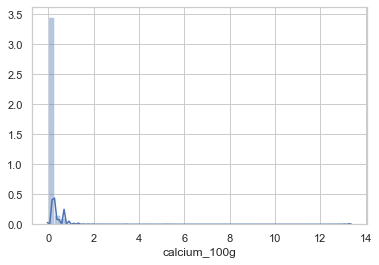

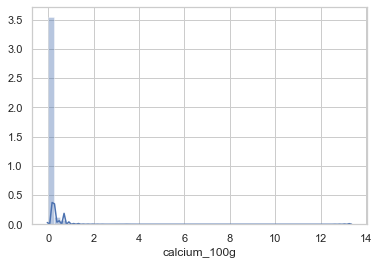

In [58]:
sns.distplot(data['calcium_100g'].head(10000).dropna())
plt.show()
sns.distplot(data_test['calcium_100g'])

### Fonction

In [59]:
def impute_knn(dataframe):
    '''Imputation des NaN de variables numériques par la méthodes des K plus proches voisins'''
    numeric_columns = dataframe.select_dtypes(['int32','float64']).columns
    imputable_columns = dataframe.select_dtypes(['int32', 'float64','category'])
    print('shape imputable columns : ', imputable_columns.shape)
    for column in imputable_columns:
        print('\n...imputation colonne ', column)
        #on identifie les indices des données manquantes pour la colonne du tour de boucle
        index_to_fill = dataframe[dataframe[column].isna()].index
        #on stocke le nombre de NaN pour comparer leur nombre avant et après le traitement
        nb_nan = dataframe[column].isna().sum()
        if nb_nan != 0 :
            #on détermine les colonnes pour lesquelles on va calculer les distances
            columns_to_calculate = dataframe[numeric_columns].iloc[index_to_fill[0],:].dropna().index.tolist() 
            #on calcule le KDTree sur la base des données des autres colonnes, après suppression de TOUS les NaN
            tree = KDTree(dataframe[columns_to_calculate].copy().dropna(axis=0).dropna(axis=1), leaf_size=2)
            print('...arbre calculé')
            #on détermine les distances/indices aux 10 plus proches voisins de tous les points du jeu de donnée
            dist, ind = tree.query(dataframe[columns_to_calculate].copy().dropna(axis=0).dropna(axis=1), k=10)
            print('...dimensions {}/indice {}calculés : '.format(dist.shape, ind.shape))
            print('index to fill : ', index_to_fill)
            #pour chaque point où on a des données manquantes, on impute la moyenne des 10 plus proches voisins 
            break
            for i, x in enumerate(index_to_fill):
                #pour les donnnées catégorielles, on attribue selon la valeur la plus fréquente
                if pd.api.types.is_categorical_dtype(dataframe[column]):
                    vote = dataframe.iloc[ind[i,:], dataframe.columns.get_loc(column)].value_counts().reset_index().iloc[0,0]
                    dataframe.iloc[x,dataframe.columns.get_loc(column)] = vote
                    
                #pour les données numériques, on attribue selon la moyenne des valeurs les plus proches
                elif pd.api.types.is_numeric_dtype(dataframe[column]):
                    mean = dataframe.iloc[ind[i,:], dataframe.columns.get_loc(column)].mean()
                    dataframe.iloc[x,dataframe.columns.get_loc(column)] = mean
                else:
                    print('Type inconnu {}, colonne {} non traitée'.format(dataframe[column].dtype, column))

        print('Colonne {} traitée, {} NaN initialement, {} NaN après imputation'.format(column, nb_nan, dataframe[column].isna().sum()))
    try:
        dataframe['nova_group'] = dataframe['nova_group'].round()
    except:
        print('colonne nova_group absente')
    return dataframe

### Observation de l'application de la fonction d'imputation sur une partie du jeu de données

In [60]:
data_test = impute_knn(clean_nan(data.head(10000),0.80))

Nombre de colonnes supprimées : 127
shape imputable columns :  (10000, 20)

...imputation colonne  serving_quantity
...arbre calculé
...dimensions (7441, 10)/indice (7441, 10)calculés : 
index to fill :  Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9035, 9036, 9039, 9040, 9041, 9042, 9043, 9044, 9045, 9046],
           dtype='int64', length=1686)


In [61]:
data_test.select_dtypes(['int32','float64', 'category']).isna().sum().sum()

43612

Regardons un exemple d'application du traitement sur plusieurs variables numériques du jeu de données :


Traitement de la variable  energy_100g
Moyenne (Avant / Après) :  1138.41905  /  1132.238143996551
Ecart-Type (Avant / Après) :  917.6647035180692  /  926.7837895892128

Traitement de la variable  fiber_100g
Moyenne (Avant / Après) :  2.887811811959801  /  2.9802725986395235
Ecart-Type (Avant / Après) :  5.135982451321182  /  4.799319522195475

Traitement de la variable  calcium_100g
Moyenne (Avant / Après) :  0.146690869  /  0.09439723226922472
Ecart-Type (Avant / Après) :  5.231861853884912  /  0.26538227308323986

Traitement de la variable  iron_100g
Moyenne (Avant / Après) :  0.0024493955  /  0.0027777826700094016
Ecart-Type (Avant / Après) :  0.0636409201082629  /  0.07961219705195235


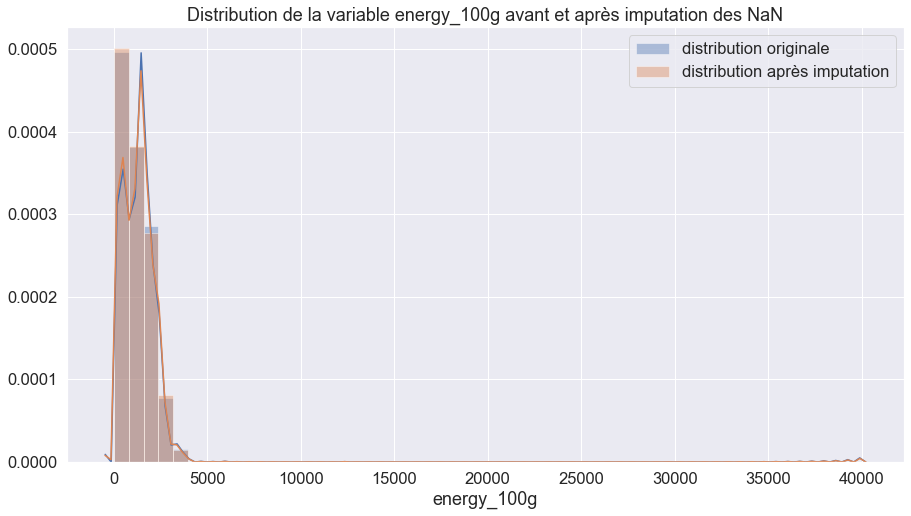

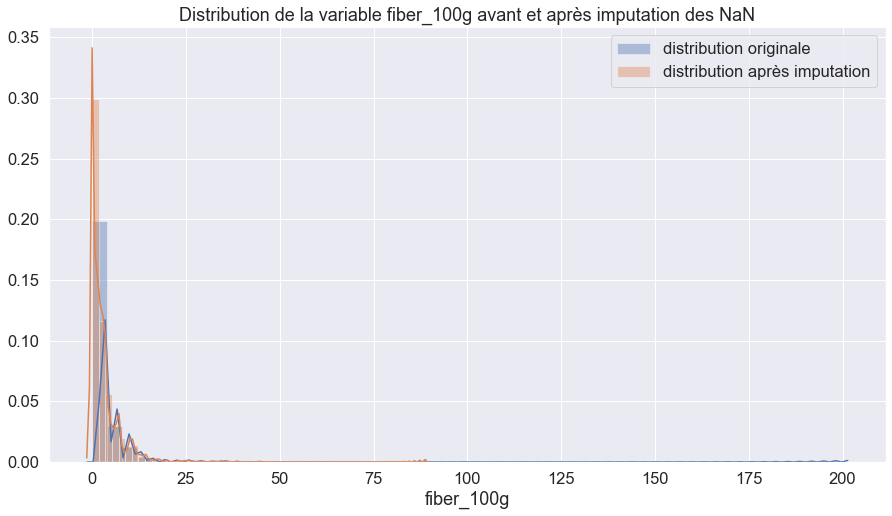

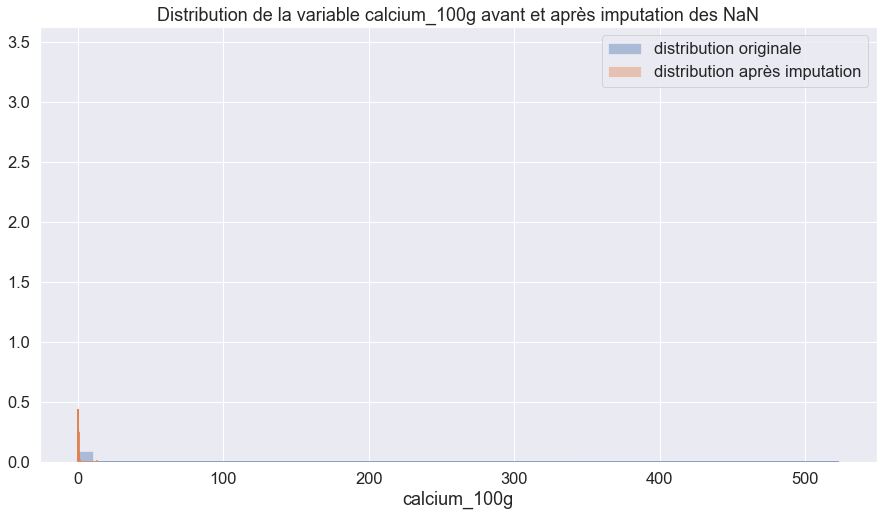

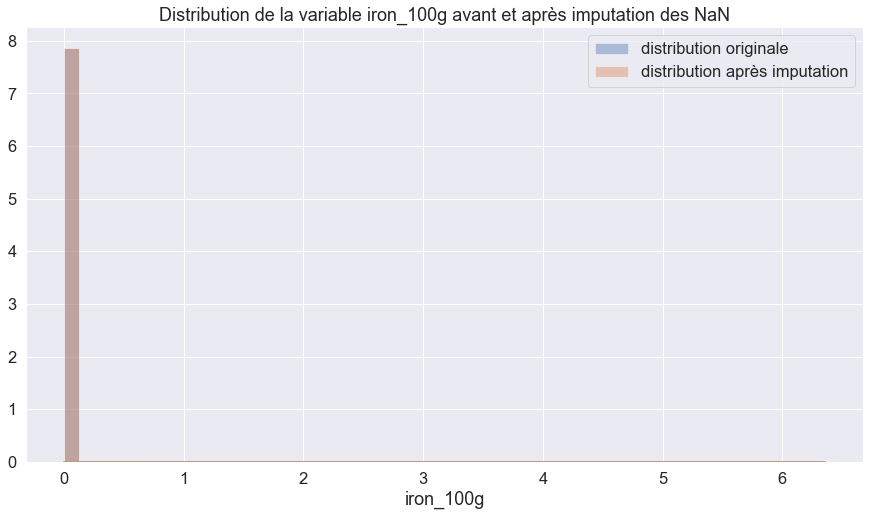

In [62]:
sns.set(font_scale=1.5)
for column in ['energy_100g', 'fiber_100g', 'calcium_100g', 'iron_100g']:
    plt.figure(figsize=(15,8))
    chaine = 'Distribution de la variable ' + column + ' avant et après imputation des NaN'
    plt.title(chaine)
    
    sns.distplot(data[column].dropna().head(10000))
    sns.distplot(data_test[column].dropna())
    plt.legend(['distribution originale', 'distribution après imputation'])
    print('\nTraitement de la variable ',column)
    print('Moyenne (Avant / Après) : ', data[column].dropna().head(10000).mean(), ' / ', data_test[column].mean())
    print('Ecart-Type (Avant / Après) : ', data[column].dropna().head(10000).std(), ' / ', data_test[column].std())
sns.set(font_scale=1)

Les graphes sont difficiles à lire sans suppression des outliers mais pour ceux qui sont lisibles, l'allure des distributions est très proches.
Lorsqu'on regarde l'impact de l'imputation sur la moyenne et l'écart type, on constate de forte disparités selon les features : 

**Moyenne**
* pour energy, calcium, fiber et iron : la moyenne varie assez peu (de l'ordre de 1 à 10%)

**Ecart Type**
* pour energy et iron, l'écart type est assez stable après application du traitement
* pour calcium et fiber, on peut constater d'importantes variations d'écart type : 
    * pour fiber : de l'ordre de 30 % de diminution,
    * pour calcium : l'écart type est réduit d'un facteur 25 (!)  observons de plus près cette variable

Recalculons l'écart type en retirant sommairement les outliers au delà du dernier centile

In [63]:
print('dernier centile : ',data['calcium_100g'].dropna().head(10000).quantile(0.99))
print('écart type avant imputation :', data['calcium_100g'].dropna().head(10000)[data[column] < 0.861].std())
print('écart type après imputation :', data_test['calcium_100g'][data_test['calcium_100g'] < 0.861].std())

dernier centile :  0.861
écart type avant imputation : 5.273585799097731
écart type après imputation : 0.13227827836062708


L'observation sur l'écart type n'est en fait pas pertinente car l'écart type calculé était fortement impacté par les outliers. On constate tout de même un écart de 30% entre l'écart type avant et après imputation, ce qui n'est pas négligeable

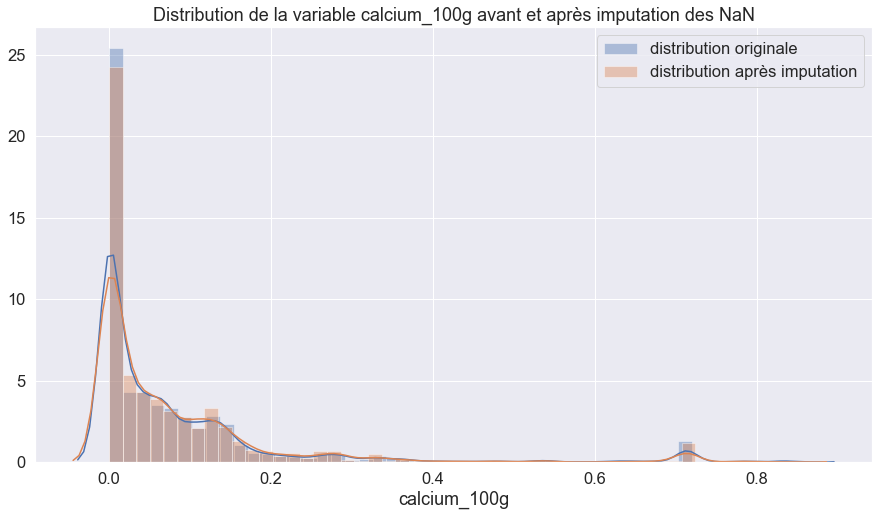

In [64]:
sns.set(font_scale=1.5)
for column in ['calcium_100g']:
    plt.figure(figsize=(15,8))
    chaine = 'Distribution de la variable ' + column + ' avant et après imputation des NaN'
    plt.title(chaine)
    
    sns.distplot(data[column].dropna().head(10000)[data[column] < 0.861])
    sns.distplot(data_test[column][data_test[column] < 0.861])
    plt.legend(['distribution originale', 'distribution après imputation'])
sns.set(font_scale=1)

En observant la distribution de calcium_100g de plus près, on voit l'impact de l'imputation:
* la distribution semble avoir été lissée : le pic d'occurence de valeur autour de 0 est réduit de 25 % tandis que les autres valeurs voient leur part augmenter dans la distribution. De même le pic d'occurence de valeur autour de 0.7 a été réduit en proportion après application de l'imputation
* dans ce cas, le KNN semble avantager les valeurs intermédiaires au détriment des valeurs plus extrêmes.

Observons l'impact sur une donnée catégorielle :

In [65]:
data_test['nova_group'].value_counts()

4.0    5133
3.0    386 
1.0    236 
2.0    90  
Name: nova_group, dtype: int64

In [66]:
clean_nan(data.head(10000),0.80)['nova_group'].value_counts()

Nombre de colonnes supprimées : 127


4.0    5133
3.0    386 
1.0    236 
2.0    90  
Name: nova_group, dtype: int64

Note : la fonction n'a pas pu être appliquée à tout le jeu de données (problème de performance)

Nombre de colonnes supprimées : 127
Nombre de colonnes supprimées : 127


Text(0.5, 1.0, 'Nova Group column\nAfter imputation')

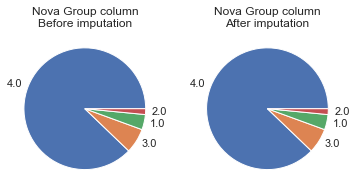

In [67]:
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(clean_nan(data.head(10000),0.80)['nova_group'].value_counts(), 
              labels = clean_nan(data.head(10000),0.80)['nova_group'].value_counts().index)
ax1.set_title('Nova Group column\nBefore imputation')

ax2.pie(data_test['nova_group'].round().value_counts(), 
              labels = data_test['nova_group'].round().value_counts().index)
ax2.set_title('Nova Group column\nAfter imputation')

On observe que le vote de la catégorie la plus présente "localement retient la catégorie majoritaire à l'échelle du jeu de donnée

### Fonction optimisée (tentative)

L'application de la fonction étant très lourde en ressource : la fonction ci-après propose de procéder avec la fonction KNeighbors Regressor

In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

def impute_knn_optimised(dataframe):
    
    #boucle sur les colonnes des features où on a des NaN
        #si catégoriel : KNeighborsClassifier
        #si numérique : KNeighborsRegressor
        #boucle sur toutes les observations:
            #si la valeur de la feature pour l'observation est un NaN:
                #pour cette observation, on sauvegarde toutes les features pour lesquellse on a pas de NaN
                #on cherche les autres observations pour lesquelles ont a la feature en question + les autres features qui ne sont pas des NaN
                #on checke dans notre dictionnaire si cette combinaison de features est présente
                    #si oui on extrait le modèle
                    #sinon on fit le knn et on enregistre dans le dictionnaire les features et le modèle
                #on prédit la valeur
    
    '''Fonction d`'imputation des NaN par la méthodes des K plus proches voisins (ici K=5)'''
    
    #on sélectionne les colonnes qui ont des NaN et de type numérique ou catégoriel
    
    imputable_columns = dataframe[
        dataframe.columns[
            dataframe.isna().any()].tolist()].select_dtypes(['int32', 'float64','category']).columns
    #print('      Shape imputable columns : ', imputable_columns.shape)
    #print(imputable_columns)
    print('NaN avant imputation : ', 100*dataframe.isna().sum().sum()/(dataframe.shape[0]*dataframe.shape[1]),'%')
    #on boucle sur les colonnes imputables
    for column in imputable_columns:
        #print('... Imputation colonne ', column)
        dict_models = {}
        list_index_nan = []
        

        #list_index_nan = dataframe[imputable_columns].isna().index.tolist()
        list_index_nan = dataframe[dataframe[column].isna()].index.tolist()
        #print('      Nombre de NaN avant imputation : {} '.format(len(list_index_nan)))
        for indice in list_index_nan:
            #on stocke la liste des features pour lesquelles l'observation en question n'a pas de NaN
            non_nan_features = dataframe.select_dtypes(['int32', 'float64']).columns[
                ~dataframe.select_dtypes(['int32', 'float64']).iloc[indice,:].isna()].tolist()
            
            #on cherche les autres observations pourquelles l'observation en question n'est pas un NaN ainsi que les features stockées juste avant
            non_nan_features_prediction = non_nan_features.copy()
            non_nan_features_prediction.append(column)
            
            #indice des valeurs pour lesqueslles on a aucun NaN dans les features et dans la feature considérée
            index_fit = dataframe[non_nan_features_prediction][~data[non_nan_features_prediction].isna().any(axis=1)].index
           
            
            if non_nan_features != []:
                if len(non_nan_features) > 4:
                    non_nan_features = non_nan_features[:4]
                #print('\nindice imputable : {}'.format(indice))
                #print(non_nan_features)
                #on détermine si le modèle est de type régression ou classifieur
                if pd.api.types.is_categorical_dtype(dataframe[column]):
                    model = KNeighborsClassifier(n_neighbors=5)
                elif pd.api.types.is_numeric_dtype(dataframe[column]):
                    model = KNeighborsRegressor(n_neighbors=5)
        
                #si la combinaison de features existe déjà dans le dictionnaire de modèles, on récupère le modèle
                if tuple((non_nan_features)) in dict_models:
                    #print('      Modèle Existant')

                    model = dict_models[tuple(non_nan_features)]
                    
                #sinon on créé un autre modèle à partir des données
                else:
                    #print('      Nouveau modèle')
                    X = dataframe.loc[index_fit, non_nan_features]
                    
                    if X.shape[0] > 2:
                        #print('      Nombre de colonnes pour entrainer le modèle : {}'.format(X.shape[1]))
                        #print('      Modèle entrainé sur {} valeurs'.format(X.shape[0]))
                        y = dataframe.loc[index_fit, column]
                        model.fit(X = X, y = y)
                        dict_models[tuple((non_nan_features))] = model
                        
                    #else:
                    #    print('      non imputé')
                    #    break

                #imputation de la valeur : prédiction
                X = dataframe.loc[indice, non_nan_features].values.reshape(1,-1)
                #print('      Shape X à imputer : {} '.format(X.shape))

                #print('      Nombre de features utilisées par le modèle:', len(non_nan_features))
                #print(id(model))
                valeur = model.predict(X)
                dataframe.loc[indice, column] = valeur
                #print('      colonne {}, indice {} : valeur à imputer {}'.format(column, indice, valeur))
                
                #print('      dictionnaire des modèles : {} modèles enregistrés'.format(len(dict_models)))
                #for key in list(dict_models.keys()):
                #    print('key : ', key)
                
        #print('      Nombre de NaN après imputation : ', dataframe[column].isna().sum())
        #print('      Fin imputation colonne {}. {} modèles fités\n'.format(column, len(dict_models)))
    print('NaN après imputation : ', 100*dataframe.isna().sum().sum()/(dataframe.shape[0]*dataframe.shape[1]),'%')
    return dataframe

En pratique, la fonction n'apporte pas de gain de performance.

## Suppression des colonnes contenant de l'information en doublon

In [69]:
#data[['countries_en', 'countries']]

On peut supprimer la colonne countries qui n'apporte pas d'information et présente des formats hétérogènes

In [70]:
columns_to_delete = ['countries']

In [71]:
# data_echantillon[['last_modified_datetime', 'last_modified_t']]

In [72]:
#data_echantillon[['created_datetime', 'created_t']]

En observant un échantillon de dates traitées, on voit que :
* last_modified_datetime et last_modified_t ont exactement les mêmes dates et aucune donnée manquante.
* created_datetime et created_t  ont exactement les mêmes dates et aucune donnée manquante.
Dans les deux cas, on peut conserver l'un des deux et supprimer l'autre

In [73]:
#data.dtypes

In [74]:
def remove_columns(dataframe) :
    colonnes = dataframe.columns.tolist()
    columns_to_delete = ['countries', 'countries_tags', 'last_modified_datetime', 'created_datetime', 
                         'main_category','brands_tags','labels',
                         'labels_en', 'categories_tags', 'categories_en', 
                        'serving_size', 'additives_en', 'traces', 'states','states_en', 'countries_en']
    for column in columns_to_delete:
        try:
            colonnes.remove(column)
        except:
            print('........colonne non présente : ', column)
    print('\n')
    return dataframe[colonnes]

## Nettoyage tirets dans titre des colonnes

In [75]:
def clean_column_names(dataframe):
    '''Fonction pour retirer les tirets dans les noms de colonnes pour avoir 
    la même mise en forme pour chaque colonne'''
    columns = dataframe.columns
    columns_treated = []
    for column in columns:
        if column[0] == '-':
            column = column[1:]
        columns_treated.append(column)
    dataframe.columns = columns_treated
    return dataframe

In [76]:
data.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_

## Application des traitements de nettoyage au dataset entier

### Fonction de nettoyage

In [83]:
import datetime
def complete_cleaning(dataframe):
    '''Application de toutes les fonctions de nettoyage vues précédemment'''
    
    #controle des colonnes du dataset
    if control_columns(dataframe) is True :
               
        #Nettoyage types de données
        print('\n', datetime.datetime.now(),' - nettoyage des types\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try : 
            dataframe = nettoyage_types(dataframe)
        except Exception as e: 
            print(e)
            print('erreur dans le nettoyage')
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
        
        #format des dates
        print('\n', datetime.datetime.now(),' - Mise en conformité du format des dates\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try:
            dataframe = clean_datetime(dataframe)
        except Exception as e: 
            print(e)
            print('Erreur dans la mise en conformité des dates')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
        
        
        #traitement des tags
        print(datetime.datetime.now(),' - Traitement des tags\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try:
            dataframe = traitement_tags(dataframe)
        except Exception as e: 
            print(e)
            print('Erreur dans le traitement des tags')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
            
            
        #réduction du dataset à la France / suppression nutriscore UK
        print('\n', datetime.datetime.now(),' - Réduction du dataset à la France\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try :
            dataframe = tri_pays(dataframe)
        except Exception as e: 
            print(e)
            print('........erreur dans la réduction du dataset')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)   
            
            
        #nettoyage des colonnes avec trop de NaN
        print(datetime.datetime.now(),' - Nettoyage des colonnes contenant plus de 20 % de NaN\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try:
            dataframe = clean_nan(dataframe, taux_nan_max = 0.80)
        except Exception as e: 
            print(e)
            print('........Erreur dans le nettoyage des colonnes contenant trop de NaN')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
        
         
        #traitement des outliers
        print('\n', datetime.datetime.now(),' - Traitement des outliers\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try:
            dataframe = delete_outliers(dataframe)
        except Exception as e: 
            print(e)
            print('.........Erreur dans le nettoyage des outliers\n')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
        

        #imputation des NaN
        print('\n', datetime.datetime.now(),' - Imputation des NaN par méthodes des kNN\n...')
        try:
            #dataframe = impute_knn(dataframe)
            print('........Traitement non appliqué par défaut (besoin en mémoire trop important.')
            print('........Un exemple de son application est visible dans le paragraphe dédié à l\'imputation ')
            print('........présenté dans ce notebook\n...')
        except Exception as e: 
            print(e)
            print('.........Erreur dans l\'imputation des NaN\n...')
        print_control_shape_nan(dataframe)
        
        #suppression des colonnes en doublon
        print(datetime.datetime.now(),' - Suppression des colonnes en doublon\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try:
            dataframe = remove_columns(dataframe)
        except Exception as e: 
            print(e)
            print('.........Erreur dans le nettoyage des colonnes inutiles')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
                
        #nettoyage des tirets dans les titres de colonnes:
        print('\n', datetime.datetime.now(),' - Nettoyage des titres de colonnes\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try :
            dataframe = clean_column_names(dataframe)
        except Exception as e: 
            print(e)
            print('.........Erreur dans le nettoyage des titres')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
        
        
        print('\n', datetime.datetime.now(),' - Nettoyage des données effectué avec succès')

    else:
        print('\n', datetime.datetime.now(),' - Jeu de données non nettoyé')
        
    return dataframe
    

### Application

In [133]:
data_to_clean_cleaned = complete_cleaning(data.copy())


 2019-12-09 08:06:16.612300  - nettoyage des types
...
........Proportion de NaN : 79.0 %, Taille du jeu de données : (1007980, 175)


 2019-12-09 08:06:41.840586  - Mise en conformité du format des dates
...
........Proportion de NaN : 79.0 %, Taille du jeu de données : (1007980, 175)

2019-12-09 08:06:59.227379  - Traitement des tags
...
........Proportion de NaN : 75.0 %, Taille du jeu de données : (1007980, 173)


 2019-12-09 08:07:35.749742  - Réduction du dataset à la France
...
........Proportion de NaN : 75.0 %, Taille du jeu de données : (498083, 172)

2019-12-09 08:07:41.670257  - Nettoyage des colonnes contenant plus de 20 % de NaN
...
Nombre de colonnes supprimées : 114
........Proportion de NaN : 27.0 %, Taille du jeu de données : (498083, 58)


 2019-12-09 08:09:34.026014  - Traitement des outliers
...
........Suppression des outliers univariés
........Proportion de NaN : 27.0 %, Taille du jeu de données : (498083, 58)

........Suppression des outliers multivariés
......

In [134]:
data_to_clean_cleaned['nutrition_grade_fr'].value_counts()

d    39483
e    27378
c    23539
a    22011
b    12923
Name: nutrition_grade_fr, dtype: int64

In [135]:
data_to_clean_cleaned.head(5)

,code,url,creator,product_name,quantity,packaging,packaging_tags,brands,categories,origins_tags,manufacturing_places_tags,labels_tags,stores,ingredients_text,traces_tags,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,nova_group,pnns_groups_1,pnns_groups_2,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,created,last_modified
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,Vitória crackers,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.200.jpg,NaN,NaN,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560,NaN,2018-06-15 10:38:00,2019-06-25 11:55:18
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,Cacao,130 g,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-13 21:06:14,2018-10-13 21:06:57
2,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,Sfiudwx,dgesc,NaN,autre,Watt,fr:Xsf,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-08 18:56:13,2019-06-08 18:56:13
3,0000000000123,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,kiliweb,Sauce Sweety chili 0%,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.200.jpg,NaN,NaN,88.0,0.0,0.00,4.8,0.4,NaN,0.2,2.04,0.816,NaN,2018-08-31 17:53:02,2018-08-31 17:53:06
4,0000000000178,http://world-en.openfoodfacts.org/product/0000000000178/mini-coco,kiliweb,Mini coco,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0178/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/ingredients_fr.7.200.jpg,NaN,NaN,251.0,3.0,1.00,10.0,3.0,NaN,2.0,1.15,0.460,NaN,2018-11-17 12:05:32,2018-11-17 12:05:33


### Taille du jeu final comparée à la taille du jeu initial 

In [136]:
taille_jeux = pd.DataFrame({'Nom' : ['données initiales', 'données nettoyées'],
                           
                            'Dimensions' : [data.shape, 
                                           data_to_clean_cleaned.shape],
                           
                            'Proportion de NaN (en %)' :
                            [data.isna().sum().sum()/data.shape[0]/data.shape[1]*100,
                             data_to_clean_cleaned.isna().sum().sum()/
                             data_to_clean_cleaned.shape[0] / 
                             data_to_clean_cleaned.shape[1]*100]
                           })

In [137]:
taille_jeux

,Nom,Dimensions,Proportion de NaN (en %)
0,données initiales,"(1007980, 175)",79.201944
1,données nettoyées,"(452606, 45)",30.684024


## Export du fichier nettoyé

In [138]:
data_to_clean_cleaned.to_csv('data/en.openfoodfacts.org.products_cleaned2.csv', index=False)

In [139]:
res = data_to_clean_cleaned.dtypes.to_frame('dtypes').reset_index()
types = res.to_csv('dtypes.csv', index=False)

# Complément : Réduction de dimension par ACP / PCA

## Application

Fonction utilisée pour la réduction de dimension (projection sur un hyperplan de dimension n en maximisant la variance)
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [140]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [141]:
data_to_clean_cleaned.select_dtypes(['float64','int32']).shape

(452606, 12)

In [142]:
data_pca = data_to_clean_cleaned.select_dtypes(['float64','int32']).drop('nutrition-score-fr_100g', axis=1).dropna()

In [143]:
colonnes_pca = data_pca.columns

In [144]:
#on ramène nos données à une moyenne nulle et une variance de 1
scaler = StandardScaler()
data_pca = scaler.fit_transform(data_pca)

In [145]:
pca = PCA(n_components = data_pca.shape[1])

In [146]:
pca.fit(data_pca)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [147]:
pca.explained_variance_ratio_

array([2.81510552e-01, 2.09157053e-01, 1.47038109e-01, 1.35595597e-01,
       8.88549949e-02, 6.27363671e-02, 4.37115556e-02, 2.58621101e-02,
       5.33467760e-03, 1.98984320e-04, 1.03156707e-34])

In [148]:
pca.singular_values_

array([3.38838108e+02, 2.92066110e+02, 2.44883691e+02, 2.35162302e+02,
       1.90364443e+02, 1.59957494e+02, 1.33518991e+02, 1.02701524e+02,
       4.66443449e+01, 9.00853846e+00, 6.48624940e-15])

## Interprétation

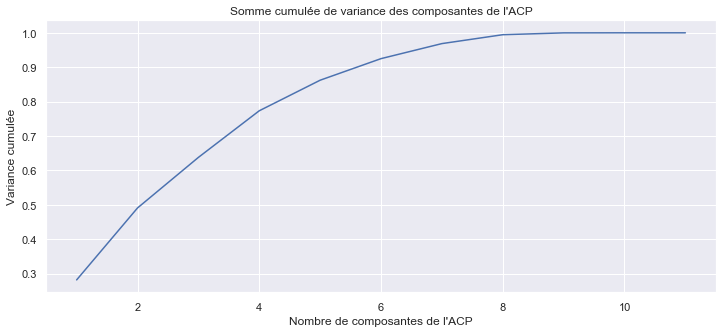

In [149]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(np.linspace(1, 11,11),
         np.cumsum(pca.explained_variance_ratio_))


On voit qu'à partir de 7 features on a une variance cumulée de plus de 95 %. On pourrait donc réduire notre jeu de données à 7 dimensions si on souhaitait gagner en temps de calcul / volume de données.


In [150]:
pca.components_

array([[ 6.98023328e-02, -1.66533454e-16,  5.51625342e-01,
         4.63681371e-01,  4.27960874e-01,  3.13106339e-01,
         2.49309546e-01,  1.89821276e-01,  2.65185431e-01,
         1.14429735e-01,  1.14218079e-01],
       [ 5.98218880e-02,  1.38777878e-16, -1.18788771e-01,
         5.60551083e-02,  1.94669285e-02, -2.62174715e-01,
        -2.66182681e-01, -3.26096395e-02,  1.32805988e-01,
         6.40445944e-01,  6.40569126e-01],
       [-3.59970606e-01,  3.33066907e-16,  2.26099859e-02,
         1.09896258e-01, -4.62252313e-02, -2.46101841e-01,
        -4.99749446e-01,  4.58799833e-01,  5.18650128e-01,
        -1.81548560e-01, -1.81453147e-01],
       [ 2.40426225e-01, -1.11022302e-16, -1.23404489e-01,
         4.21240620e-01,  4.73457031e-01, -5.15365452e-01,
        -1.80854320e-01, -3.81290137e-01, -9.04829072e-02,
        -1.91858420e-01, -1.91500729e-01],
       [ 8.89942257e-01,  1.66533454e-16, -1.15448948e-02,
        -1.42012910e-01, -1.71046713e-01,  2.63266686e-02,
  

In [151]:
pca.components_.shape

(11, 11)

Dans l'hypothèse où on ne retiendrait que les 2 composantes les plus explicatives, on obtient le plan factoriel ci-dessous

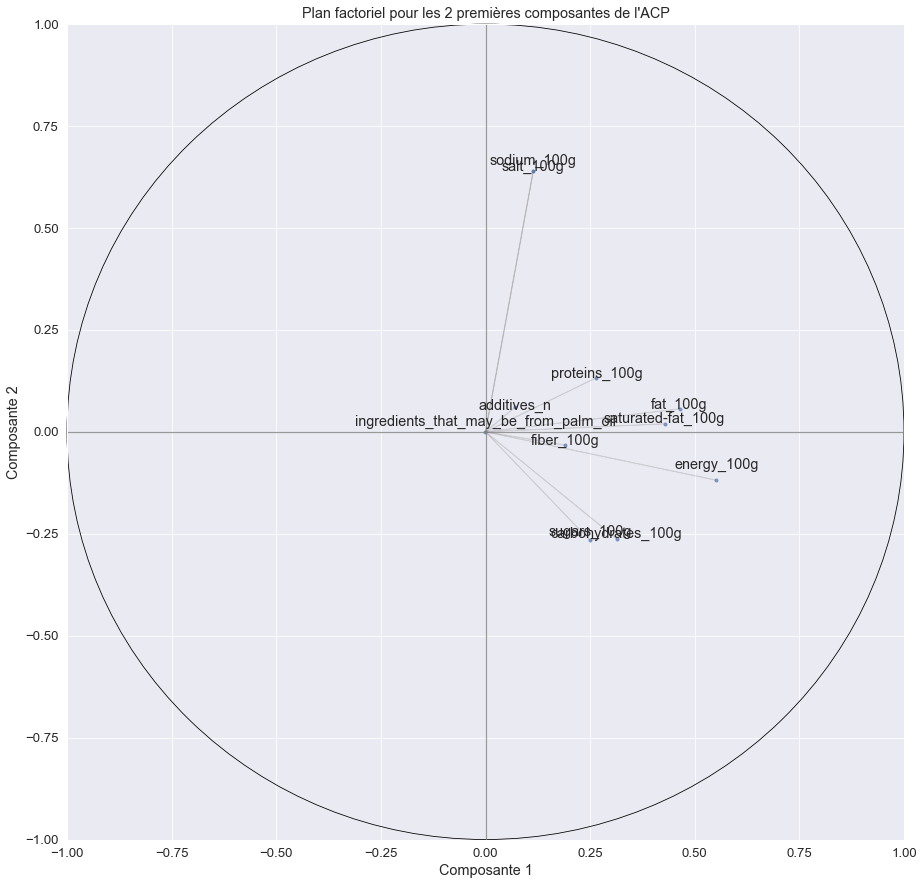

In [152]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


sns.set_context("paper", font_scale=1) 

Observations : 
* fat_100g et saturated-fat_100g expliquent bien la variance sur la composante 1 mais pas sur al composante 2
* ingredients_that_may_be_from_palm_oil n'explique la variable sur aucune des 2 composantes
* additives_n n'explique pas la variable sur la composante 2 et quasiment pas sur la composante 1
* sodium_100g et salt_100g sont quasi confondus : les variables sont corrélées positivement
* carbohydrates_100g et sugars_100g sont très proches et donc également corrélées positivement : 
* carbohydrates_100g, sugars_100g, sodium_100g et salt_100g expliquent bien al variance sur la composante 2, moins sur la composante 1.

NB : ces résultats sont  cohérents avec ce qui est observé dans l'analyse multivariée (voir notebook suivant : partie analyse multivariée)


Regardons maintenant comment le jeu de donnée est réparti sur les deux premières composantes en fonction des nutri scores

Retraçons le même graphe que précédemment en ajoutant les points du jeu de donnée, après transformation, ainsi que l'information relative au nutriscore

In [153]:
nutriscore_index = data_to_clean_cleaned.select_dtypes(['float64','int32']).drop('nutrition-score-fr_100g', axis=1).dropna().index
nutriscore_grade = data_to_clean_cleaned['nutrition_grade_fr'].loc[nutriscore_index]
nutriscore_grade = nutriscore_grade.cat.add_categories("Unknown").fillna("Unknown")

unknown_index = nutriscore_grade[nutriscore_grade =='Unknown'].index

In [154]:
x_show = pca.transform(data_to_clean_cleaned.select_dtypes(['float64','int32'])
                       .drop('nutrition-score-fr_100g', axis=1).drop(unknown_index).dropna())[:,0]

y_show = pca.transform(data_to_clean_cleaned.select_dtypes(['float64','int32'])
                       .drop('nutrition-score-fr_100g', axis=1).drop(unknown_index).dropna())[:,1]

hue_show = nutriscore_grade[nutriscore_grade != 'Unknown']

In [155]:
x_show

array([ 381.40100314, 1353.54107821,  398.19569501, ...,  294.29122058,
         18.47256776,    8.46228637])

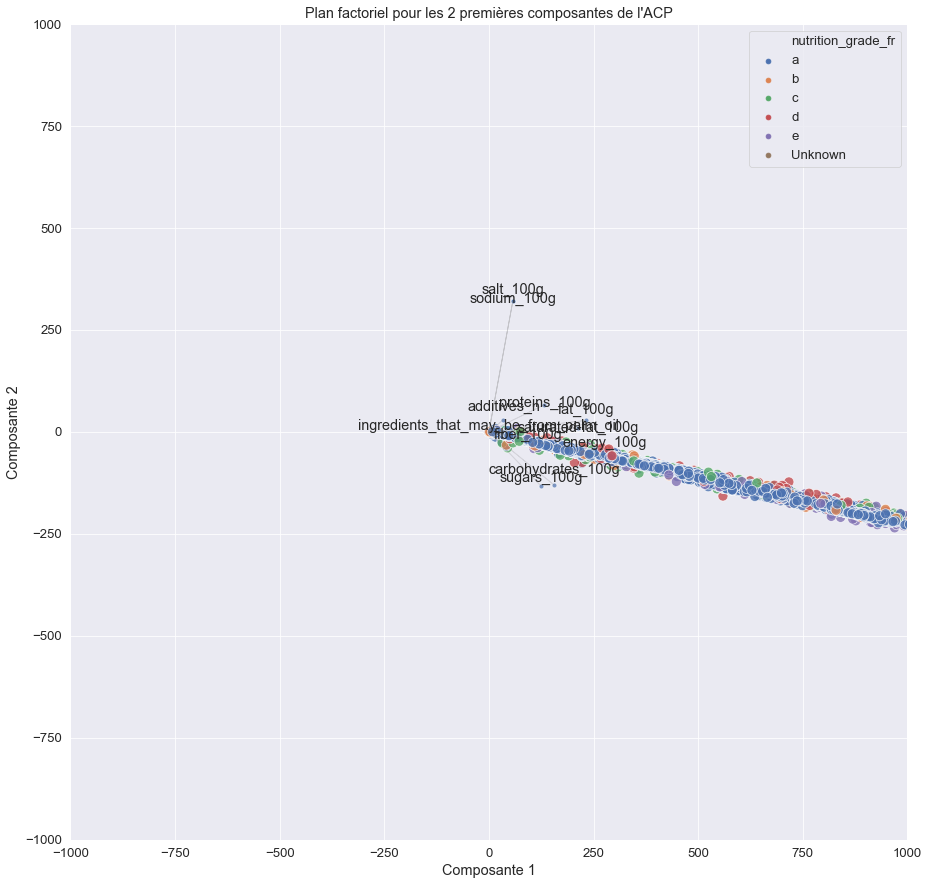

In [166]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

ax.set_xlim(-1000,1000)
ax.set_ylim(-1000,1000)
x_pca = pca.components_[0,:]*500
y_pca = pca.components_[1,:]*500

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
sns.scatterplot(x = x_show,
                y = y_show,
                hue = hue_show,
                alpha=0.8, s=100)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5+np.random.randint(-10,10)), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


sns.set_context("paper", font_scale=1) 


On observe que :
* on observe des alignements de points le long de certains vecteurs (en particulier energy_100g)
* On observe que les nutriscore d ont tendance à avoir des valeurs plus importantes en sucres
* Sur ces deux premières composantes, on observe uen première tendance de sépération des points avec :
    * des nutriscores d'indice a centrés autour de l'origine
    * des nutriscores d'indices d fortement alignés avec les composantes saturated_fat_100g, fat_100g et sugars_100g 
    * des nutriscores d'indices c en position intermédiaire entre a et d

In [157]:
pca_analysis = pd.DataFrame(pca.components_)
pca_analysis.columns = colonnes_pca

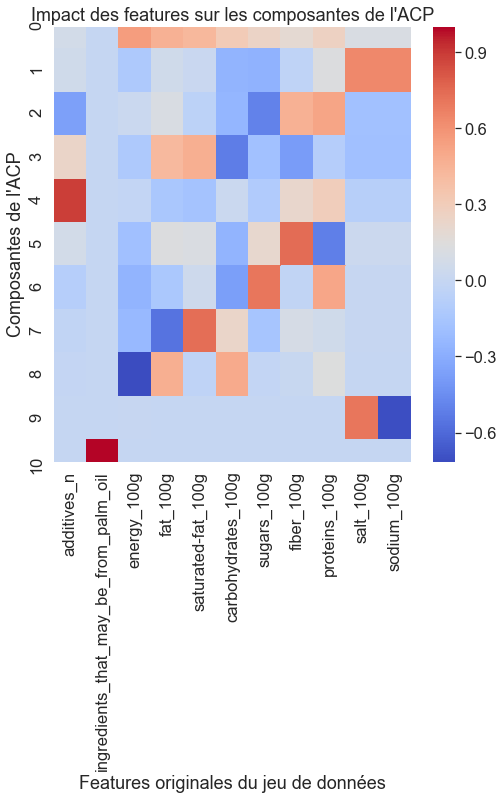

In [158]:
sns.set(font_scale=1.5)
plt.figure(figsize=(8,8))
sns.set
sns.heatmap(pca_analysis, cmap='coolwarm')
plt.title('Impact des features sur les composantes de l\'ACP')
plt.xlabel('Features originales du jeu de données')
plt.ylabel('Composantes de l\'ACP')
sns.set(font_scale=1)

In [159]:
norms = np.linalg.norm(pca.components_[0:6], axis=0)

In [160]:
norms

array([9.96315447e-01, 4.55436774e-16, 6.07719978e-01, 6.67654613e-01,
       6.73549130e-01, 7.49962641e-01, 6.88063836e-01, 9.95092223e-01,
       8.44144484e-01, 7.07090288e-01, 7.07078442e-01])

In [161]:
normes = pd.DataFrame(norms).T

In [162]:
normes.columns = colonnes_pca

In [163]:
normes = normes.T.reset_index()

In [164]:
normes.columns = ['feature', 'norme']
normes.sort_values(by='norme', inplace=True, ascending=False)

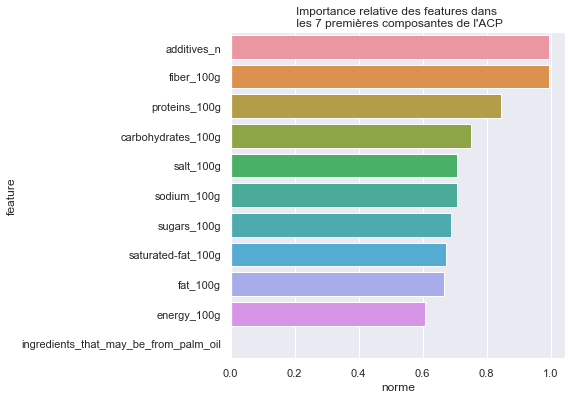

In [165]:
plt.figure(figsize=(6,6))
plt.title('Importance relative des features dans \n les 7 premières composantes de l\'ACP')
sns.barplot(y = normes['feature'],
            x = normes['norme'])

# Parties suivantes : voir notebook analysis